# Step 1

We download historical price data for Google, Inc. for June 2018 to present.


In [ ]:
import yfinance as yf

# Define the symbol of the security you want to retrieve data for
security_symbol = "GOOG"

# Define the date range for the time series
start_date = "2018-06-01"

# Fetch historical price data
security_data = yf.download(security_symbol, start=start_date)

# Extract the closing prices from the data
closing_prices = security_data['Adj Close']

# Display the time series of closing prices
print(closing_prices)


[*********************100%%**********************]  1 of 1 completed
Date
2018-06-01     55.974998
2018-06-04     56.964500
2018-06-05     56.983002
2018-06-06     56.844002
2018-06-07     56.193001
                 ...    
2023-11-14    135.429993
2023-11-15    136.380005
2023-11-16    138.699997
2023-11-17    136.940002
2023-11-20    138.139999
Name: Adj Close, Length: 1378, dtype: float64


The mean stock price is \$93.22, indicating the average value, while the median is slightly lower at \$90.89. The standard deviation of \$30.91 suggests notable price variability. The 25th percentile is \$61.70, denoting the lower quartile, and the 75th percentile stands at \$120.96, representing the upper quartile.  We are looking at prices over a five year period so the price will tend to increase over time.

In [ ]:
import numpy as np

# Calculate summary statistics
mean = np.mean(closing_prices)
median = np.median(closing_prices)
std_dev = np.std(closing_prices)
percentiles = np.percentile(closing_prices, [25, 75])

print("Mean:", mean)
print("Median:", median)
print("Standard Deviation:", std_dev)
print("25th Percentile:", percentiles[0])
print("75th Percentile:", percentiles[1])

Mean: 93.4703721543355
Median: 91.1349983215332
Standard Deviation: 30.990600034645194
25th Percentile: 61.76712512969971
75th Percentile: 121.49349975585938


 Here is a histogram of the closing prices for Google, Inc. The plot is divided into 20 bins, showcasing the frequency of different closing price ranges.

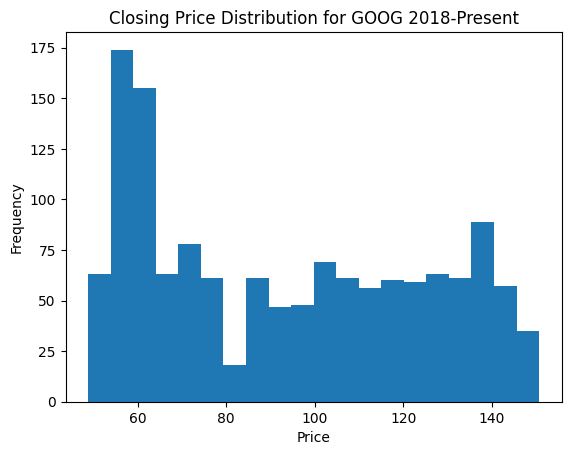

In [ ]:
import matplotlib.pyplot as plt

# Create a histogram of the closing prices
plt.hist(closing_prices, bins=20)
plt.title("Closing Price Distribution for GOOG 2018-Present")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()


Here is a plot of the autocorrelation function.  The ACF measures the correlation between a time series and its lagged values, helping to identify patterns and dependencies within the data over time.  The plot suggests that there is a correlation between the price level and its lagged value.

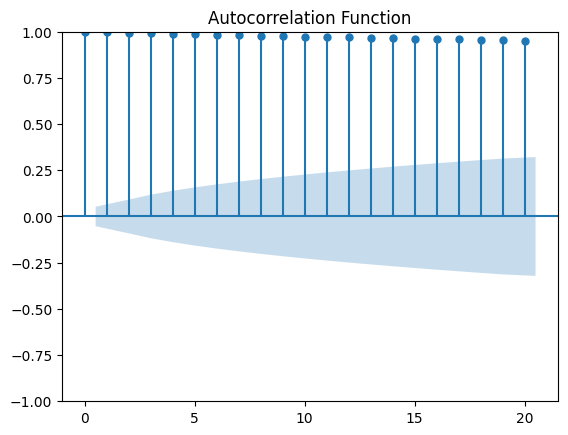

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

# Plot the autocorrelation function
plot_acf(closing_prices, lags=20)
plt.title("Autocorrelation Function")
plt.show()


The Augmented Dickey-Fuller test helps determine whether a time series has a unit root, which is indicative of non-stationarity. The test produces a p-value, and the code compares this value to the significance level of 0.05.  We see that we fail to reject the hypothesis that the series has a unit root; hence we do not reject the hypothesis that the series is non-stationary.

In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(closing_prices)
p_value = result[1]
print(f"Augmented Dickey-Fuller test value:  {result[0]}")
if p_value < 0.05:
    print("The time series is stationary.")
else:
    print(f"The time series is not stationary p={p_value:0.2f}.")


Augmented Dickey-Fuller test value:  -0.9288929979813513
The time series is not stationary p=0.78.


**Transformation of time series using first differencing method**

To transform Google stock  which exhibit non-stationary time series into a stationary one using first differencing, you essentially calculate the difference between consecutive observations. This helps in removing the trend or any systematic pattern present in the data.

After taking first differences, we can again apply the augmented Dickey-Fuller test to get that the resulting series is stationary.

In [ ]:
# Differencing to remove trend
differenced_series = closing_prices.diff().dropna()

# Check for stationarity again
result = adfuller(differenced_series)
p_value = result[1]
print(f"Augmented Dickey-Fuller test value:  {result[0]}")

if p_value < 0.05:
    print(f"The differenced time series is stationary p = {p_value}.")
else:
    print(f"Differencing did not make the time series stationary p = {p_value}.")


Augmented Dickey-Fuller test value:  -38.67903028857809
The differenced time series is stationary p = 0.0.


 Based on the above results, we reject the hypothesis that the series has a unit root; hence we do reject the hypothesis that the series is non-stationary.Therefore, by differencing the time series, we effectively remove any trend or non-stationarity in the original time series

Here is a plot of the closing prices for Google, adjusted for splits and dividends.

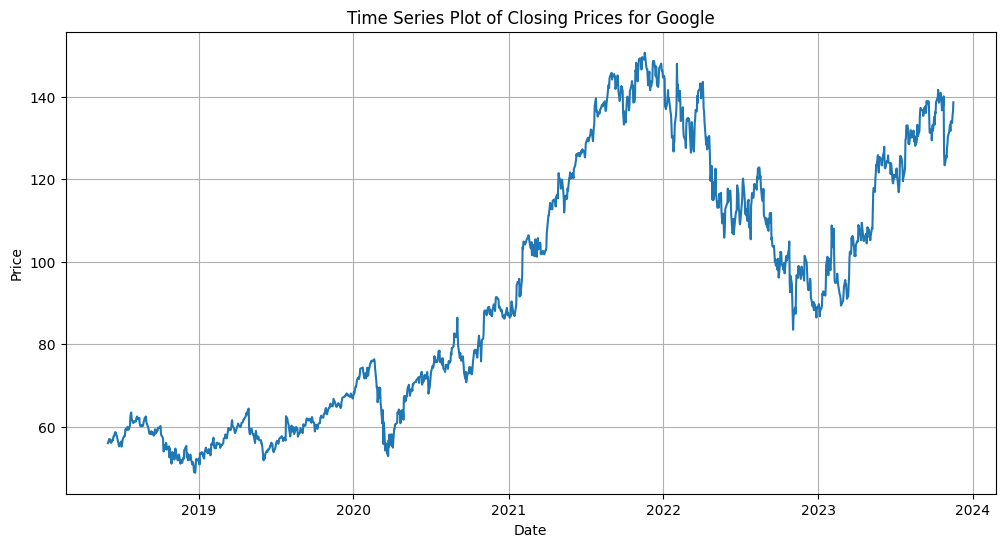

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(closing_prices)
plt.title("Time Series Plot of Closing Prices for Google")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid(True)
plt.show()

In the Figure above, the plot shows Google's stock price fluctuations since June 2018 up to date. We can observe that while the overall trend is positive, there is also a noticeable recurring cyclic pattern occurring alongside the upward trend. This fluctuation suggests that there might be some degree of non-stationarity, as stationary time series typically exhibit constant mean over time

Here is a plot of the differenced time series. It suggets that the mean daily change and standard deviation are relatively stable; hence the series is likely stationary.

<ipython-input-10-8e784fed6ef1>:15: UserWarning: The label '_child3' of <matplotlib.lines.Line2D object at 0x79e0cb0ff760> starts with '_'. It is thus excluded from the legend.
  plt.legend(handles=[mean_line, std_dev_line_pos, std_dev_line_neg], loc='best')


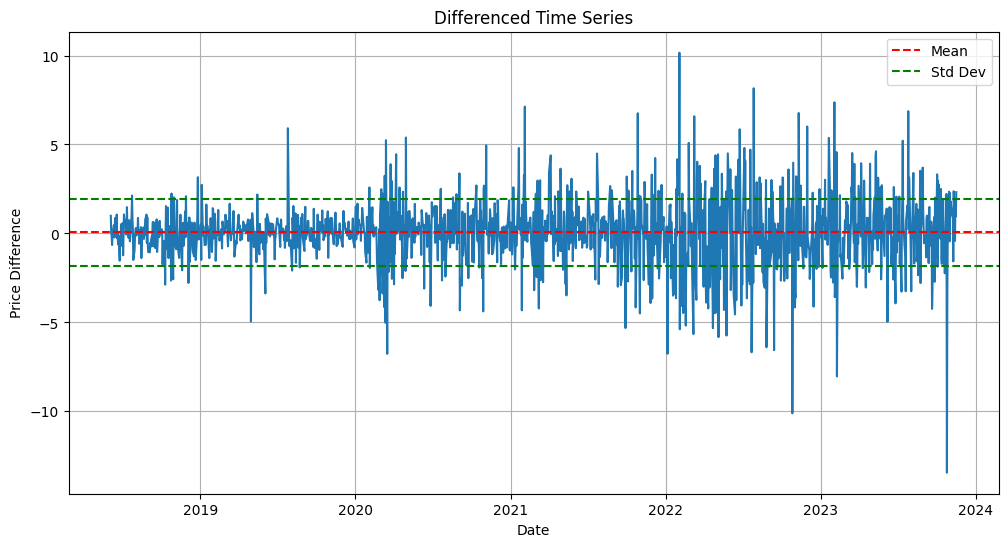

In [ ]:
import matplotlib.pyplot as plt

# Create a time series plot of the differenced data
plt.figure(figsize=(12, 6))
plt.plot(differenced_series)
plt.title("Differenced Time Series")
plt.xlabel("Date")
plt.ylabel("Price Difference")
plt.grid(True)

# Add horizontal lines for mean and standard deviation (both positive and negative)
mean_line = plt.axhline(y=differenced_series.mean(), color='r', linestyle='--', label='Mean')
std_dev_line_pos = plt.axhline(y=differenced_series.mean() + differenced_series.std(), color='g', linestyle='--', label='Std Dev')
std_dev_line_neg = plt.axhline(y=differenced_series.mean() - differenced_series.std(), color='g', linestyle='--')
plt.legend(handles=[mean_line, std_dev_line_pos, std_dev_line_neg], loc='best')

plt.show()



From the above plot, we can observe Google's stock price fluctuates around zero throughout the entire period under review. However, the fluctuation in this first difference widens over time, indicating a time-dependent variance. Consequently, it implies that employing only the first differencing of Google's stock price is insufficient to achieve stationarity.

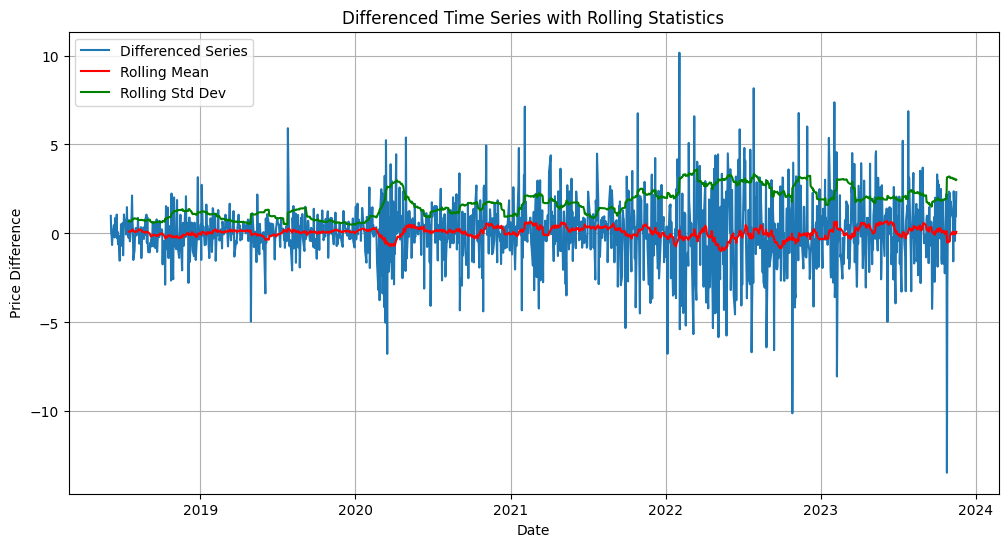

In [ ]:
rolling_mean = differenced_series.rolling(window=30).mean()
rolling_std = differenced_series.rolling(window=30).std()

plt.figure(figsize=(12, 6))
plt.plot(differenced_series, label="Differenced Series")
plt.plot(rolling_mean, label="Rolling Mean", color='red')
plt.plot(rolling_std, label="Rolling Std Dev", color='green')
plt.title("Differenced Time Series with Rolling Statistics")
plt.xlabel("Date")
plt.ylabel("Price Difference")
plt.legend()
plt.grid(True)
plt.show()


**Test of normality using QQ plot**

The following QQ plot shows how well the differences in the daily closing GOOG stock levels align with a standard normal distribution. If the points closely follow the line, it suggests that the differences in stock levels are approximately normally distributed. Deviations from the line may indicate non-normality or other distributional differences.

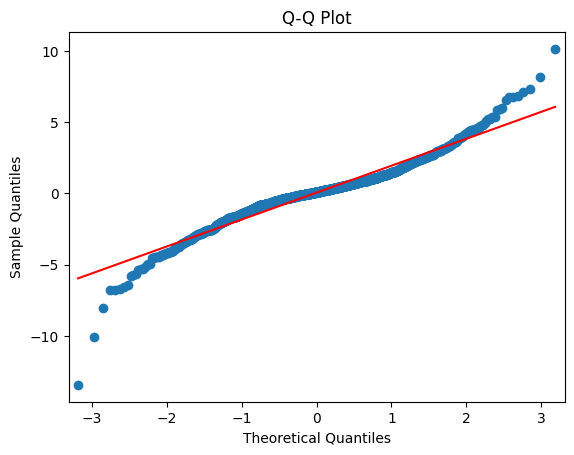

In [ ]:
from statsmodels.graphics.gofplots import qqplot

qqplot(differenced_series, line='s')
plt.title("Q-Q Plot")
plt.show()


We can see from the above plot that the tails of the points on the QQ plot deviate substantially from the diagonal line, suggesting that the distribution has heavier or lighter tails than a normal distribution.

In [ ]:
!pip install tsfracdiff

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.7/981.7 kB 9.2 MB/s eta 0:00:00


**Transformation of the time series using fractional differencing**

Fractional differencing can be used to make the time series more stationary by applying frectional order differencing operator. Unlike the traditional differencing which involves subtracting the previous observation from the current one (first differencing), fractional differencing allows for a non-interger differencing order, thereby introducing more flexibility in capturing the characteristics of the time series data

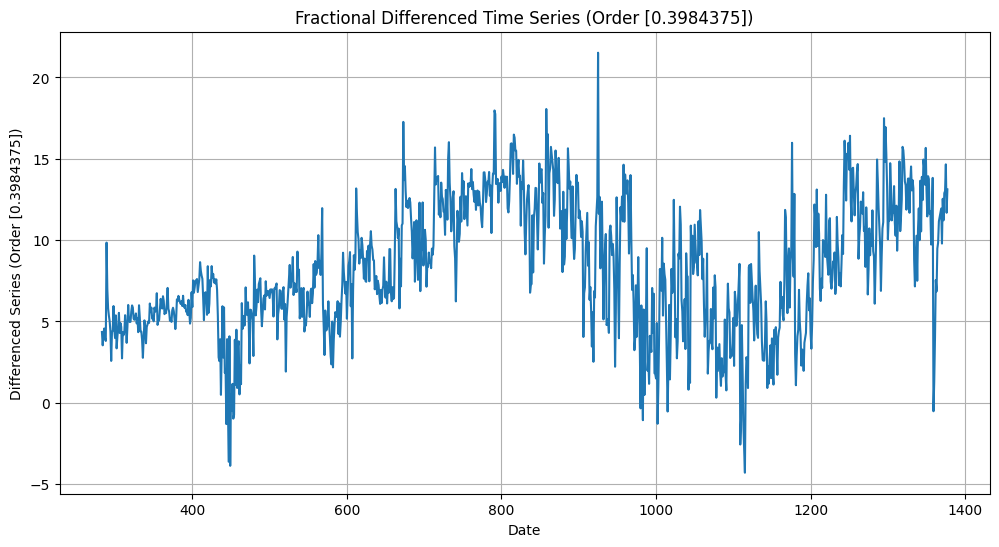

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tsfracdiff import FractionalDifferentiator
fracDiff = FractionalDifferentiator()


# Create a fractional differencing object
fd = FractionalDifferentiator()

# Apply fractional differencing to the time series
fdifferenced_series = fd.FitTransform(closing_prices.values)

# Plot the resulting differenced series
plt.figure(figsize=(12, 6))
plt.plot(fdifferenced_series)
plt.title(f"Fractional Differenced Time Series (Order {fd.orders})")
plt.xlabel("Date")
plt.ylabel(f"Differenced Series (Order {fd.orders})")
plt.grid(True)
plt.show()


In [ ]:
!pip install tsfracdiff

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.7/981.7 kB 9.8 MB/s eta 0:00:00


The above plot provides visual representation of the transformed time series using fractional differencing method. we can observe Google's stock price fluctuates around five throughout the entire period under review.

Performing an augmented Dickey-fuller test indicates that the fractionally differenced series is indeed stationary.

In [ ]:
# Perform the ADF test on the differenced series
result = adfuller(fdifferenced_series)
p_value = result[1]
print (f"Augmented Dickey Fuller test value: {result[0]}")
if p_value < 0.05:
    print(f"The fractionally differenced series is stationary (p-value: {p_value:.4f})")
else:
    print(f"The fractionally differenced series is not stationary (p-value: {p_value:.4f})")


Augmented Dickey Fuller test value: -3.6154485026550005
The fractionally differenced series is stationary (p-value: 0.0055)


Based on the above results, we reject the hypothesis that the series has a unit root; hence we do reject the hypothesis that the series is non-stationary. Hence, the fractionally differenced time series is staitonary

<Figure size 1000x600 with 0 Axes>

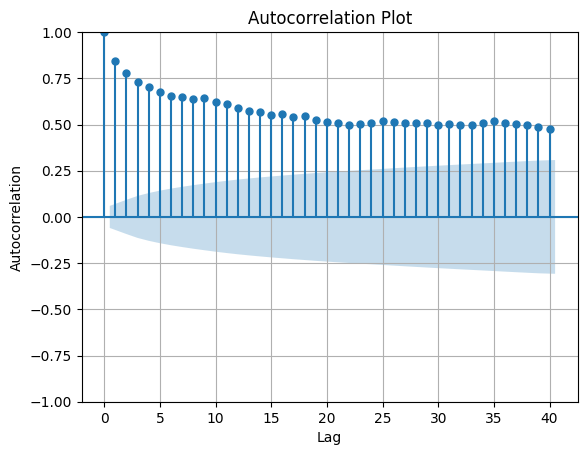

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize=(10, 6))
plot_acf(fdifferenced_series, lags=40)
plt.title('Autocorrelation Plot')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()


<Figure size 1000x600 with 0 Axes>

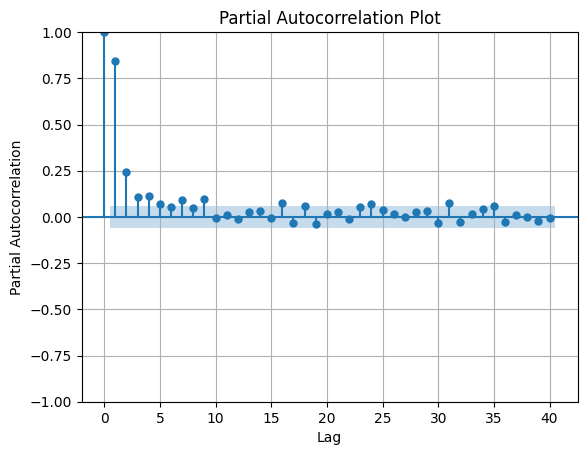

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf

plt.figure(figsize=(10, 6))
plot_pacf(fdifferenced_series, lags=40)
plt.title('Partial Autocorrelation Plot')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.grid(True)
plt.show()

The two plots above are ACF and PACF of the fractionally differenced time series. We can see that while ACF decreases very slowly, the PACF, drops drastically to almost zero after just two lags

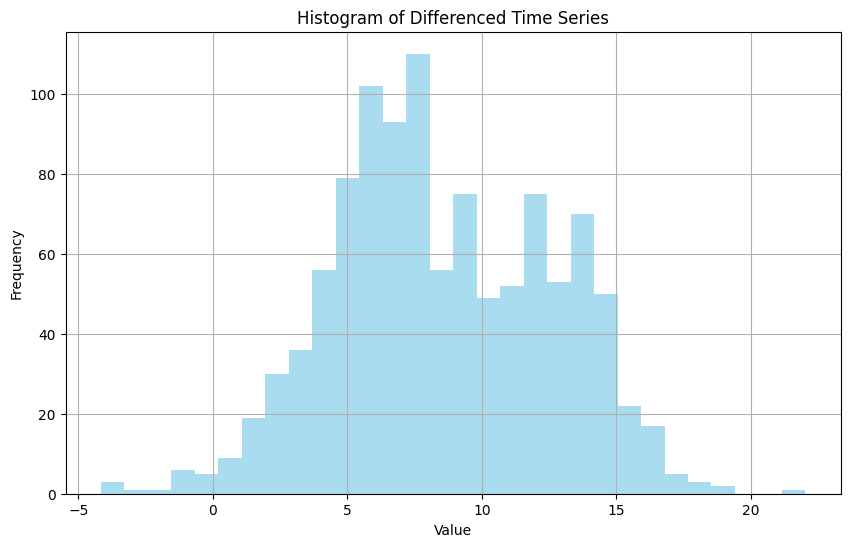

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(fdifferenced_series, bins=30, color='skyblue', alpha=0.7)
plt.title('Histogram of Differenced Time Series')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


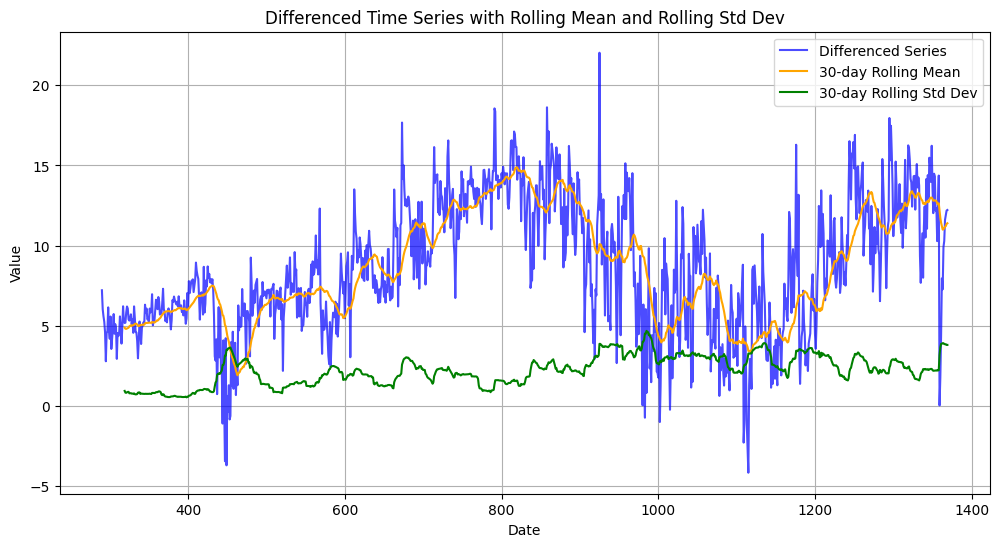

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming fdifferenced_series is your differenced time series
window_size = 30  # Adjust the window size as needed

# Calculate rolling mean and rolling standard deviation
rolling_mean = fdifferenced_series.rolling(window=window_size).mean()
rolling_std = fdifferenced_series.rolling(window=window_size).std()

# Create a figure and plot the differenced series
plt.figure(figsize=(12, 6))
plt.plot(fdifferenced_series, label='Differenced Series', alpha=0.7, color='blue')

# Plot rolling mean and rolling standard deviation
plt.plot(rolling_mean, label=f'{window_size}-day Rolling Mean', color='orange')
plt.plot(rolling_std, label=f'{window_size}-day Rolling Std Dev', color='green')

plt.title('Differenced Time Series with Rolling Mean and Rolling Std Dev')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)

plt.show()


# Step 2

**Building and training a Multi-Layer Percetron model**

We build and train an MLP neural network for time series prediction, specifically predicting the next data point in a time series of closing prices based on a specified look-back period. The performance of the model is evaluated using Mean Squared Error, and the actual vs. predicted values are visualized using a line plot.  Our multilevel perceptron consists of densely-connected layers.

9/9 [==============================] - 0s 2ms/step


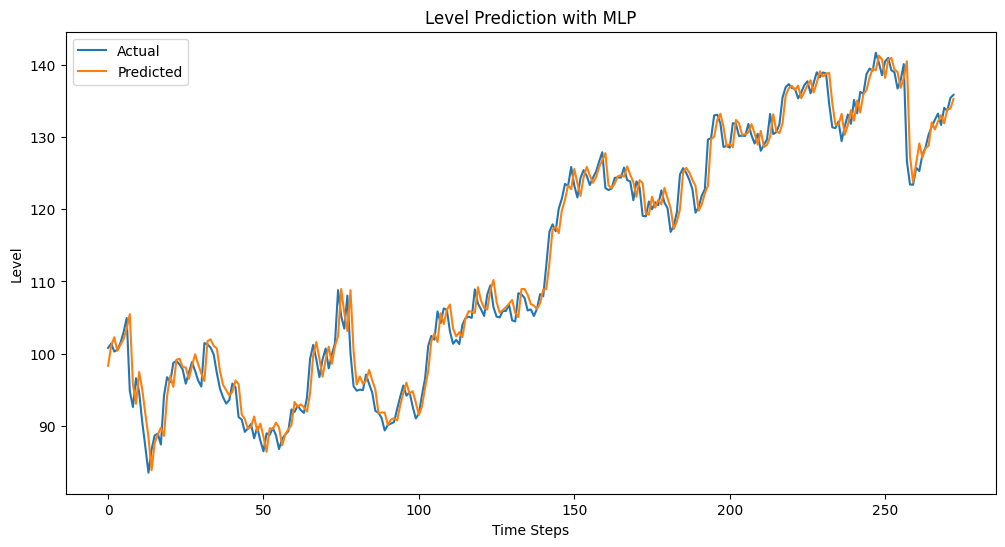

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError

look_back = 10

level_data = closing_prices.values

X, y = [], []

for i in range(len(level_data) - look_back):
    X.append(level_data[i:i+look_back])
    y.append(level_data[i+look_back])

X = np.array(X)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = Sequential()
model.add(Dense(64, activation='relu', input_dim=look_back))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(1))

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss=MeanSquaredError())

model.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_test, y_test), verbose=0)

test_loss = model.evaluate(X_test, y_test)

y_pred = model.predict(X_test)

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title("Level Prediction with MLP")
plt.xlabel("Time Steps")
plt.ylabel("Level")
plt.legend()
plt.show()


From the above figure, we can observe a close alignment between actual and predicted values in the visualization suggesting good performance of MLP model in predicting the time series.

**Model evaluation using R-squared**

In [ ]:
from sklearn.metrics import r2_score
# Calculate the R-squared value
r_squared = r2_score(y_test, y_pred)

print(f"R-squared (R²): {r_squared:.4f}")

R-squared (R²): 0.9740


Based on the R-squared results obtained above, the MLP model explain 97.4% of the variation in the time series, an indication of good model performance

**Multi-Layer Perceptron based on first differenced time series**

We build and train an MLP neural network for prediction task based on first differenced time series, specifically predicting the closing prices based on a specified look-back period. The performance of the model is evaluated using Mean Squared Error, and the actual vs. predicted values are visualized using a line plot. We again use a multilevel perceptron with dense layers.

In [ ]:

look_back = 10

X, y = [], []

for i in range(len(differenced_series) - look_back):
    X.append(differenced_series[i:i+look_back])
    y.append(differenced_series[i+look_back])

X = np.array(X)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = Sequential()
model.add(Dense(64, activation='relu', input_dim=look_back))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(1))

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss=MeanSquaredError())

model.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_test, y_test), verbose=0)

test_loss = model.evaluate(X_test, y_test)

y_pred = model.predict(X_test)




9/9 [==============================] - 0s 3ms/step


In [ ]:
from sklearn.metrics import r2_score

# Calculate the R-squared score for y_test and y_pred
r_squared = r2_score(y_test, y_pred)

print(f"R-squared score: {r_squared}")


R-squared score: -0.32182858000920556


The negative R-squared suggests that the model might not be capturing any meaningful patterns or relationships present in the data. It could be overfitting to noise, or the features being used might not have strong predictive power for the given target variable.








This plot visualizes the performance of a differenced series prediction using a Multi-Layer Perceptron (MLP) model. The blue line represents the actual values of the differenced series (presumably the ground truth or test set), while the orange line represents the predicted values generated by the MLP model.

The chart helps compare how well the model's predictions align with the actual data across different time steps. If the orange line closely follows the blue line, it suggests that the model's predictions are in good agreement with the actual values. Conversely, significant deviations between the two lines might indicate areas where the model struggles to accurately predict the differenced series.

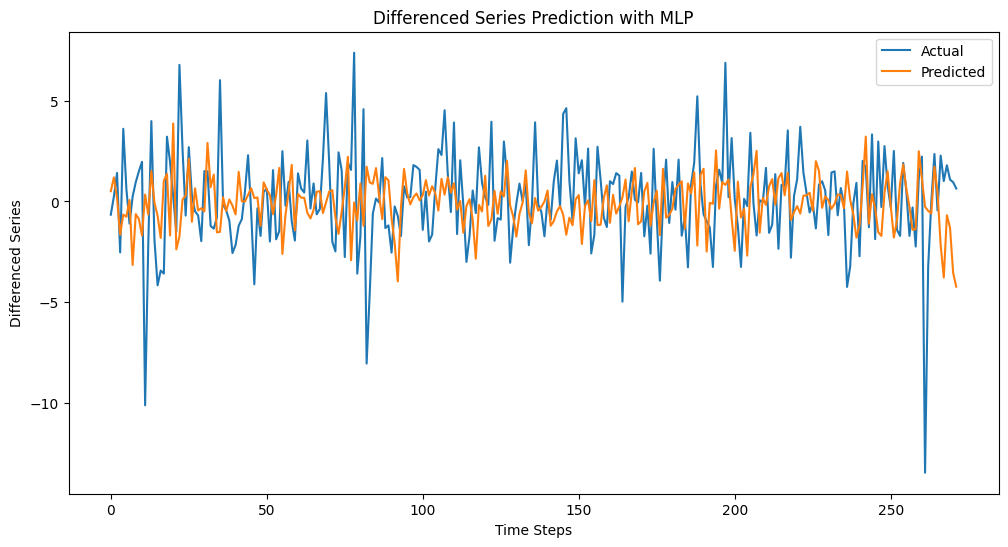

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title("Differenced Series Prediction with MLP")
plt.xlabel("Time Steps")
plt.ylabel("Differenced Series")
plt.legend()
plt.show()


We try to predict the direction for the differenced series; we train a neural network using a multilayer perceptron with dense layers.  We use binary cross entropy as our loss function.

In [ ]:
look_back = 10

X, y = [], []

for i in range(len(differenced_series) - look_back):
    X.append(differenced_series[i:i+look_back])
    # Assign 1 for positive differences, 0 for negative differences
    y.append(1 if differenced_series[i+look_back] >= 0 else 0)

X = np.array(X)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = Sequential()
model.add(Dense(64, activation='relu', input_dim=look_back))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
from keras.losses import BinaryCrossentropy
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss=BinaryCrossentropy())

model.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_test, y_test), verbose=0)

test_loss = model.evaluate(X_test, y_test)

# Make predictions
y_pred = model.predict(X_test)


9/9 [==============================] - 0s 5ms/step


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
# Convert predicted probabilities to binary predictions (1 or 0)
predicted_labels = (y_pred > 0.5).astype(int)

# Compute and print the confusion matrix
conf_matrix = confusion_matrix(y_test, predicted_labels)
print("Confusion Matrix:")
print(conf_matrix)

# Compute and print the classification report
class_report = classification_report(y_test, predicted_labels)
print("Classification Report:")
print(class_report)

Confusion Matrix:
[[63 69]
 [81 59]]
Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.48      0.46       132
           1       0.46      0.42      0.44       140

    accuracy                           0.45       272
   macro avg       0.45      0.45      0.45       272
weighted avg       0.45      0.45      0.45       272



In [ ]:
look_back = 10

aoeu = np.reshape(fdifferenced_series.values, (1080,))

look_back = 10

X, y = [], []

for i in range(len(aoeu) - look_back):
    X.append(aoeu[i:i+look_back])
    y.append(aoeu[i+look_back])

X = np.array(X)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = Sequential()
model.add(Dense(64, activation='relu', input_dim=look_back))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(1))

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss=MeanSquaredError())

model.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_test, y_test), verbose=0)

test_loss = model.evaluate(X_test, y_test)

y_pred = model.predict(X_test)


7/7 [==============================] - 0s 3ms/step


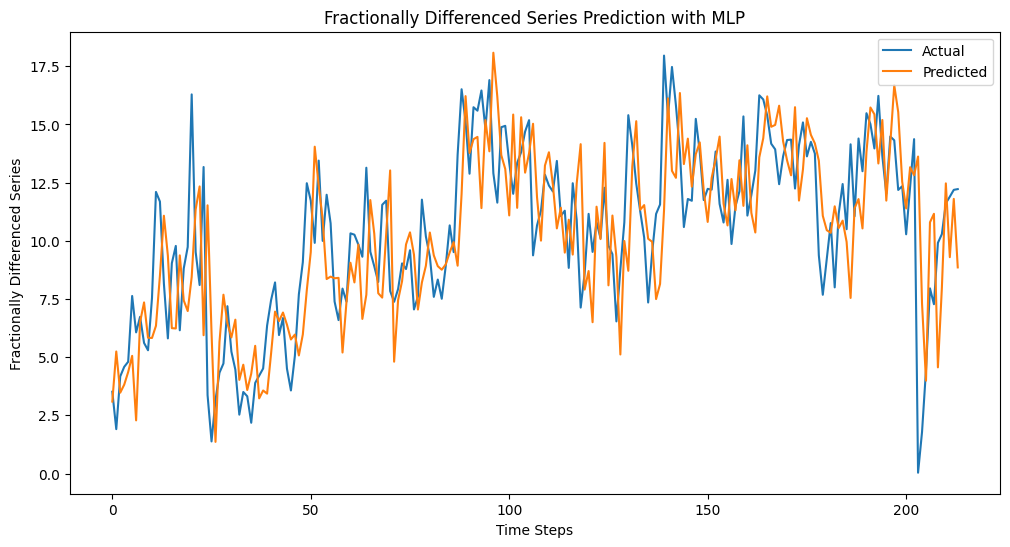

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title("Fractionally Differenced Series Prediction with MLP")
plt.xlabel("Time Steps")
plt.ylabel("Fractionally Differenced Series")
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import r2_score

# Calculate the R-squared score for y_test and y_pred
r_squared = r2_score(y_test, y_pred)

print(f"R-squared score: {r_squared}")

R-squared score: 0.39175115545488026


The MLP model applied tho the original data performed the best out of the three models with an out-of-sample R^2 score of 0.974. This indicates that the model was able to capture almost all of the variance and patterns in the time series for next value prediction. The power of MLPs lies in their ability to approximate complex non-linear relationships. The several hidden layers likely enabled the model to learn nuanced dependencies between lagged values in the data to make accurate forecasts.

The differenced model performed poorly. Differencing helps stabilize fluctuations but may have removed some useful signals that the model could have exploited otherwise. Also, differenced series are inherently difficult to predict due to near zero mean and uncorrelated noise-like behavior.

Relative to the differenced series we obtained improved model performance with an MLP trained on the fractionally differenced data, achieving an out-of-sample $R^2$ of 0.39. This suggests the series exhibits mean-reverting behavior that gets amplified by the fractional differencing operation. The model exploits this to capture some predictive signal.

# Step 3

We create a GAF (Gramian Angular Field) representation of the time series in levels.  We build and train a convolutional neural network that is desigend to predict the level of the time series.  We divide the time series into windows of length 30, and compute images corresponding to the Gramian Angular Field. The time series values are transformed to fit within the range of [-1, 1].
The arccosine function is applied element-wise to the scaled time series.
We create a $30\times30$ matrix by performing an outer sum operation on the arccosine-transformed series. The cosine function is applied element-wise to the resulting matrix from the outer sum. The resulting matrix represents the Gramian Angular Field (GAF) representation of the input time series.

In [ ]:
def generate_gaf(time_series):
    # Map the time series to the range [-1, 1]
    scaled_series = 2 * (time_series - np.min(time_series)) / (np.max(time_series) - np.min(time_series)) - 1

    # Take the arccosine
    arccos_series = np.arccos(scaled_series)

    # Perform the outer sum
    gaf_matrix = np.add.outer(arccos_series, arccos_series)

    # Take the cosine of the resulting matrix
    gaf_matrix = np.cos(gaf_matrix)

    return gaf_matrix

We create windows of 30 days starting at each possible position, showing how the prices changed over those periods.

In [ ]:
import numpy as np

X_train = []
window_size = 30
for i in range(window_size, closing_prices.shape[0]):
    X_train.append(closing_prices[i - window_size : i])
X_train = np.array(X_train)
print(X_train.shape)
# Define a "window_size"-days interval
days = np.linspace(1, X_train.shape[0], num=X_train.shape[0])

(1344, 30)


In [ ]:
import matplotlib.pyplot as plt
from pyts.image import GramianAngularField

In [ ]:
!pip install pyts

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 26.7 MB/s eta 0:00:00


We turn each window into a gramian angular field representation.

In [ ]:
transformer = GramianAngularField()
X_train_new = transformer.transform(X_train)
print(X_train_new.shape)

(1344, 30, 30)


Here are some plots of the Gramian Angular Field for various windows generated from the closing prices data.

(30, 30)


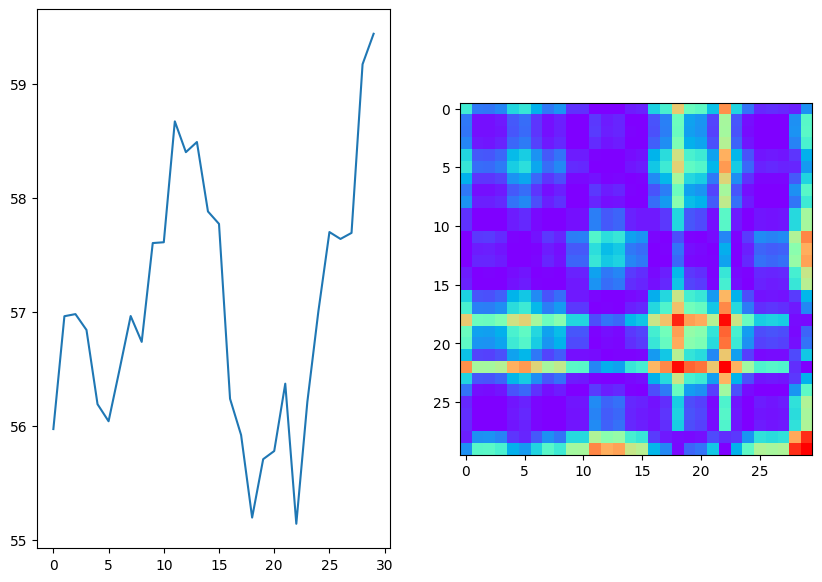

In [ ]:
# Show the results for the first time series
fig, ax = plt.subplots(1, 2, figsize=(10, 7), gridspec_kw={"width_ratios": [1, 1]})
ax[0].plot(X_train[0, :])
ax[1].imshow(X_train_new[0], cmap="rainbow")
print(X_train_new[0].shape)

(30, 30)


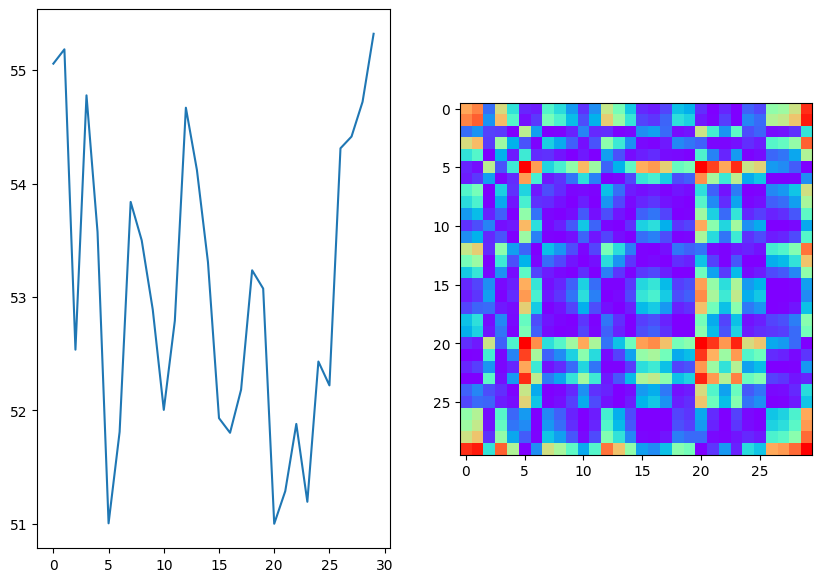

In [ ]:
# Show the results for the 100th time series
fig, ax = plt.subplots(1, 2, figsize=(10, 7), gridspec_kw={"width_ratios": [1, 1]})
ax[0].plot(X_train[99, :])
ax[1].imshow(X_train_new[99], cmap="rainbow")
print(X_train_new[99].shape)

We get a target variable by looking at the stock price after some time.

In [ ]:
y_data = []
for i in range(window_size, closing_prices.shape[0] - window_size):
    y_data.append(closing_prices[i])
y_data = np.array(y_data)

In [ ]:
# Determine the examples to be used as inputs in the model and rescale them to the [0,255] scale
X_data = X_train_new[:-window_size]
for i in range(X_data.shape[0]):
    X_data[i] = (X_data[i] - np.min(X_data[i])) / (
        np.max(X_data[i]) - np.min(X_data[i])
    )
# We could simply write X_data = (X_data + 1)/2
X_data = X_data * 255
X_data.shape

(1318, 30, 30)

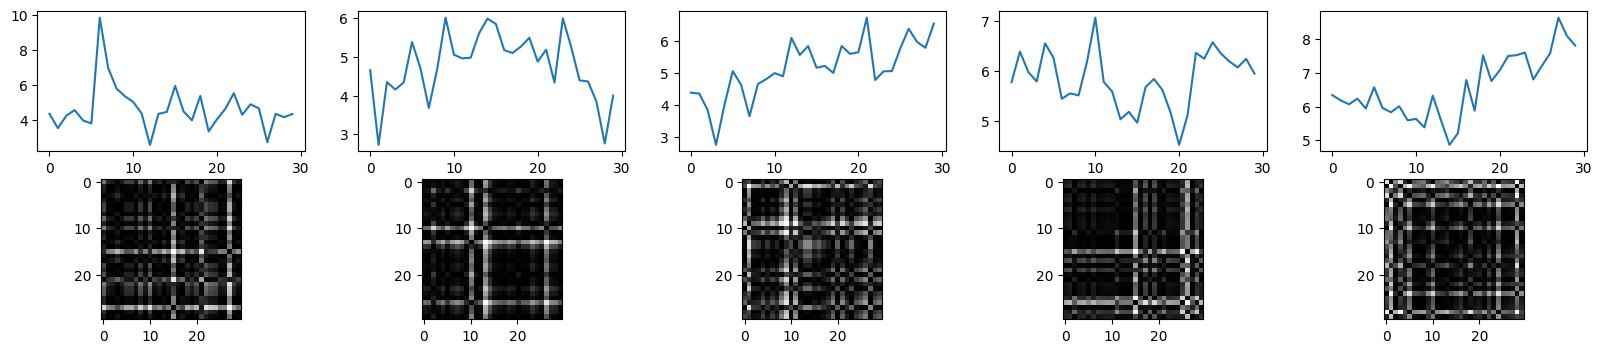

In [ ]:
# display several time series and the corresponding images
fig, ax = plt.subplots(2, 5, figsize=(20, 4))
for i in range(0, 125, 25):
    ax[0, int(i / 25)].plot(X_train[i])
for i in range(0, 125, 25):
    ax[1, int(i / 25)].imshow(X_data[i], "gray")

We train a convolutional neural network to predict the future price level based on the Gramian angular field of the last 30 days of prices.

In [ ]:
# Split into train and test
train_split = 0.8
y_data_train = y_data[: int(train_split * y_data.shape[0])]
y_data_test = y_data[int(train_split * y_data.shape[0]) :]
X_data_train = X_data[: int(train_split * y_data.shape[0])]
X_data_test = X_data[int(train_split * y_data.shape[0]) :]

In [ ]:
import tensorflow as tf
model = tf.keras.Sequential()
# Input layer
model.add(tf.keras.layers.InputLayer(input_shape=(30, 30, 1)))
model.add(tf.keras.layers.Conv2D(32, 3, activation="relu"))
model.add(tf.keras.layers.MaxPooling2D(2))
model.add(tf.keras.layers.Conv2D(64, 3, activation="relu"))
model.add(tf.keras.layers.MaxPooling2D(2))
model.add(tf.keras.layers.Conv2D(128, 3, activation="relu"))
model.add(tf.keras.layers.MaxPooling2D(2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(4096, activation="relu"))
model.add(tf.keras.layers.Dropout(0.5, seed=1234))
model.add(tf.keras.layers.Dense(1))

In [ ]:

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss=tf.keras.losses.MeanSquaredError())

In [ ]:
model.fit(
    x=X_data_train,
    y=y_data_train,
    epochs=200,
    validation_data=(X_data_test, y_data_test),
    verbose=1,
)

Epoch 1/200
33/33 [==============================] - 7s 210ms/step - loss: 36.9758 - val_loss: 791.9605
Epoch 2/200
33/33 [==============================] - 6s 191ms/step - loss: 32.8871 - val_loss: 696.3576
Epoch 3/200
33/33 [==============================] - 6s 171ms/step - loss: 22.6733 - val_loss: 668.0141
Epoch 4/200
33/33 [==============================] - 7s 209ms/step - loss: 32.7598 - val_loss: 787.3331
Epoch 5/200
33/33 [==============================] - 5s 146ms/step - loss: 34.9221 - val_loss: 663.6700
Epoch 6/200
33/33 [==============================] - 6s 175ms/step - loss: 33.4314 - val_loss: 925.6884
Epoch 7/200
33/33 [==============================] - 6s 192ms/step - loss: 27.8497 - val_loss: 999.8066
Epoch 8/200
33/33 [==============================] - 5s 150ms/step - loss: 43.8361 - val_loss: 753.6816
Epoch 9/200
33/33 [==============================] - 6s 188ms/step - loss: 38.0439 - val_loss: 875.5281
Epoch 10/200
33/33 [==============================] - 5s 160ms/s

We obtain an $R^2$ score of -2.32 indicating that using Gramian Angular Fields is not helpful in predicting the price level.

In [ ]:
from sklearn.metrics import r2_score
y_pred = model.predict(X_data_test)
# Calculate the R-squared score for y_test and y_pred
r_squared = r2_score(y_data_test, y_pred)

print(f"R-squared score: {r_squared}")


9/9 [==============================] - 0s 16ms/step
R-squared score: -2.321430434195791


The following plot shows the predicted and actual data for predicting the price level using the Gramian Angular Field and a convolutional Neural Network.

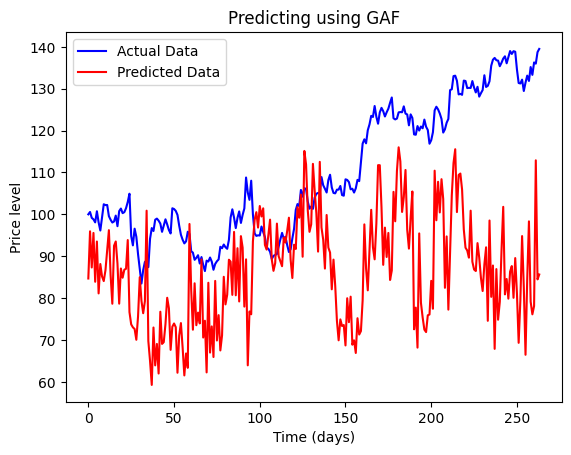

In [ ]:
# Plotting the actual data (y_data_test)
plt.plot(range(len(y_data_test)), y_data_test, label='Actual Data', color='blue')

# Plotting the predicted data (y_pred)
plt.plot(range(len(y_pred)), y_pred, label='Predicted Data', color='red')

# Adding labels and a legend
plt.xlabel('Time (days)')
plt.ylabel('Price level')
plt.title("Predicting using GAF")
plt.legend()

In [ ]:
y_data = []
for i in range(window_size, closing_prices.shape[0] - window_size):
    y_data.append(closing_prices[i + window_size] > closing_prices[i])
y_data = np.array(y_data)
# Split into train and test
train_split = 0.8
y_data_train = y_data[: int(train_split * y_data.shape[0])]
y_data_test = y_data[int(train_split * y_data.shape[0]) :]
X_data_train = X_data[: int(train_split * y_data.shape[0])]
X_data_test = X_data[int(train_split * y_data.shape[0]) :]

In [ ]:
import tensorflow as tf
model = tf.keras.Sequential()
# Input layer
model.add(tf.keras.layers.InputLayer(input_shape=(30, 30, 1)))
model.add(tf.keras.layers.Conv2D(32, 3, activation="relu"))
model.add(tf.keras.layers.MaxPooling2D(2))
model.add(tf.keras.layers.Conv2D(64, 3, activation="relu"))
model.add(tf.keras.layers.MaxPooling2D(2))
model.add(tf.keras.layers.Conv2D(128, 3, activation="relu"))
model.add(tf.keras.layers.MaxPooling2D(2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(4096, activation="relu"))
model.add(tf.keras.layers.Dropout(0.5, seed=1234))
model.add(tf.keras.layers.Dense(1, activation="sigmoid"))

We also try using the Gramian Angular Field to predict the next direction of price movement.

In [ ]:

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss=tf.keras.losses.BinaryCrossentropy())

In [ ]:
model.fit(
    x=X_data_train,
    y=y_data_train,
    epochs=200,
    validation_data=(X_data_test, y_data_test),
    verbose=0,
)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

predicted_labels = (y_pred > 0.5).astype(int)

# Compute and print the confusion matrix
conf_matrix = confusion_matrix(y_data_test, predicted_labels)
print("Confusion Matrix:")
print(conf_matrix)

# Compute and print the classification report
class_report = classification_report(y_data_test, predicted_labels)
print("Classification Report:")
print(class_report)

Confusion Matrix:
[[  0  87]
 [  0 176]]
Classification Report:
              precision    recall  f1-score   support

       False       0.00      0.00      0.00        87
        True       0.67      1.00      0.80       176

    accuracy                           0.67       263
   macro avg       0.33      0.50      0.40       263
weighted avg       0.45      0.67      0.54       263



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 The confusion matrix shows that the model always predicted that the stock price will go up. This resulted in a precision of 0 for 'goes down' and 0.67 for 'goes up'. However, the recall for 'goes up' is 1.0, indicating that the model correctly identified all 'goes up' instances but failed to identify any 'goes down' instances. The overall accuracy is 0.67, but it's primarily driven by the 'goes up' class due to the imbalance.  

We again create windows of 30 days each for the differenced series and generate images using the Gramian Angular Field.

In [ ]:
import numpy as np

X_train = []
window_size = 30
for i in range(window_size, closing_prices.shape[0]):
    X_train.append(differenced_series[i - window_size : i])
X_train = np.array(X_train)
print(X_train.shape)
# Define a "window_size"-days interval
days = np.linspace(1, X_train.shape[0], num=X_train.shape[0])

(1348, 30)


In [ ]:
import matplotlib.pyplot as plt
from pyts.image import GramianAngularField
transformer = GramianAngularField()
X_train_new = transformer.transform(X_train)
print(X_train_new.shape)

(1348, 30, 30)


Here are some plots of the Gramian Angular Fields generated by looking at the differenced time series.

(30, 30)


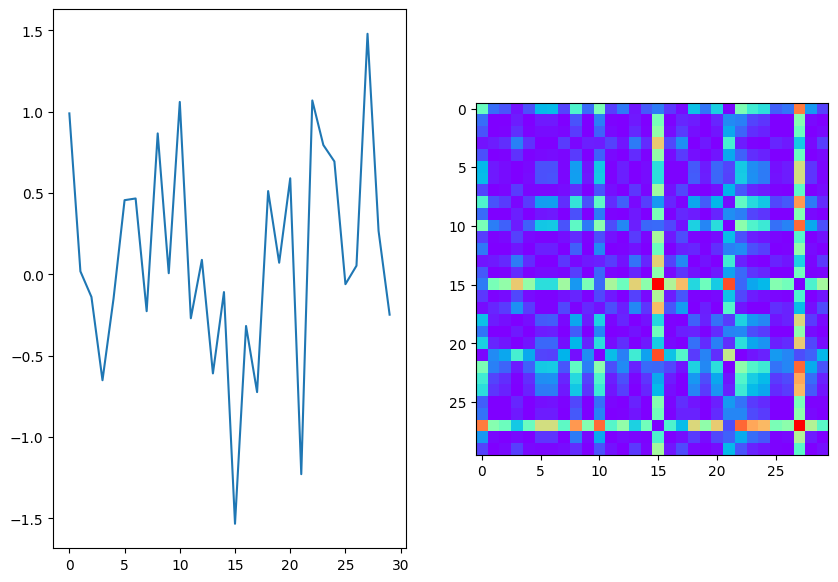

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 7), gridspec_kw={"width_ratios": [1, 1]})
ax[0].plot(X_train[0, :])
ax[1].imshow(X_train_new[0], cmap="rainbow")
print(X_train_new[0].shape)

We get the next change in the price for our target variable.

In [ ]:
y_data = []
for i in range(window_size, differenced_series.shape[0] - window_size):
    y_data.append(differenced_series[i])
y_data = np.array(y_data)

We train a convolutional network using the Gramian Angular Field data.

In [ ]:

# Determine the examples to be used as inputs in the model and rescale them to the [0,255] scale
X_data = X_train_new[:-window_size]
for i in range(X_data.shape[0]):
    X_data[i] = (X_data[i] - np.min(X_data[i])) / (
        np.max(X_data[i]) - np.min(X_data[i])
    )
# We could simply write X_data = (X_data + 1)/2
X_data = X_data * 255
X_data.shape
# Split into train and test
train_split = 0.8
y_data_train = y_data[: 1051]
y_data_test = y_data[1051 :]
X_data_train = X_data[: 1051]
X_data_test = X_data[1051 :-1]

In [ ]:
import tensorflow as tf
model = tf.keras.Sequential()
# Input layer
model.add(tf.keras.layers.InputLayer(input_shape=(30, 30, 1)))
model.add(tf.keras.layers.Conv2D(32, 3, activation="relu"))
model.add(tf.keras.layers.MaxPooling2D(2))
model.add(tf.keras.layers.Conv2D(64, 3, activation="relu"))
model.add(tf.keras.layers.MaxPooling2D(2))
model.add(tf.keras.layers.Conv2D(128, 3, activation="relu"))
model.add(tf.keras.layers.MaxPooling2D(2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(4096, activation="relu"))
model.add(tf.keras.layers.Dropout(0.5, seed=1234))
model.add(tf.keras.layers.Dense(1))

In [ ]:

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss=tf.keras.losses.MeanSquaredError())

In [ ]:
model.fit(
    x=X_data_train,
    y=y_data_train,
    epochs=200,
    validation_data=(X_data_test, y_data_test),
    verbose=1,
)

Epoch 1/200
33/33 [==============================] - 3s 89ms/step - loss: 0.2285 - val_loss: 5.3066
Epoch 2/200
33/33 [==============================] - 3s 78ms/step - loss: 0.1862 - val_loss: 5.2112
Epoch 3/200
33/33 [==============================] - 3s 99ms/step - loss: 0.2004 - val_loss: 5.2956
Epoch 4/200
33/33 [==============================] - 4s 126ms/step - loss: 0.1521 - val_loss: 5.2236
Epoch 5/200
33/33 [==============================] - 3s 86ms/step - loss: 0.1535 - val_loss: 5.4212
Epoch 6/200
33/33 [==============================] - 3s 78ms/step - loss: 0.1826 - val_loss: 5.2009
Epoch 7/200
33/33 [==============================] - 3s 86ms/step - loss: 0.1579 - val_loss: 5.3825
Epoch 8/200
33/33 [==============================] - 4s 125ms/step - loss: 0.1390 - val_loss: 5.3521
Epoch 9/200
33/33 [==============================] - 4s 109ms/step - loss: 0.1327 - val_loss: 5.2677
Epoch 10/200
33/33 [==============================] - 3s 77ms/step - loss: 0.1470 - val_loss: 5.3

In [ ]:
from sklearn.metrics import r2_score
y_pred = model.predict(X_data_test)
# Calculate the R-squared score for y_test and y_pred
r_squared = r2_score(y_data_test, y_pred)

print(f"R-squared score: {r_squared}")

9/9 [==============================] - 0s 15ms/step
R-squared score: -0.09330695136961231


After training the model, we get an $R^2$ score of $-0.09$ indicating that the
Gramian Angular Field method was not informative in prediciting the price change.

Here is a plot of the predictions and actual price change data:

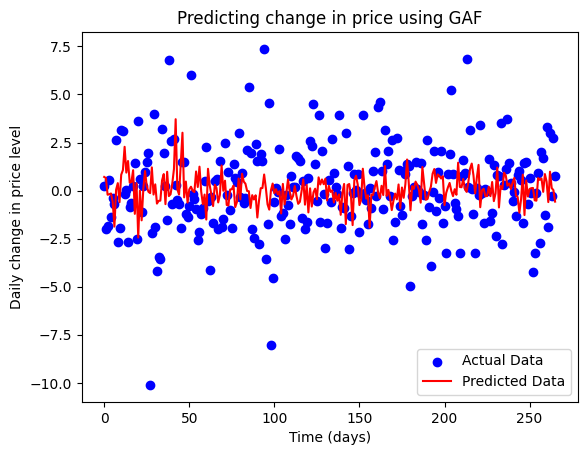

In [ ]:
# Plotting the actual data (y_data_test)
plt.scatter(range(len(y_data_test)), y_data_test, label='Actual Data', color='blue')

# Plotting the predicted data (y_pred)
plt.plot(range(len(y_pred)), y_pred, label='Predicted Data', color='red')

# Adding labels and a legend
plt.xlabel('Time (days)')
plt.ylabel('Daily change in price level')
plt.title("Predicting change in price using GAF")
plt.legend()

We perform similar predictions for the fractionally differenced series.  We again generate windows of length 30 starting at each day.

In [ ]:
import numpy as np
frac_diff_series = list(np.transpose(fdifferenced_series.values)[0])
X_train = []
window_size = 30
for i in range(window_size, fdifferenced_series.shape[0]):
    X_train.append(frac_diff_series[i - window_size : i])
X_train = np.array(X_train)
#print(X_train.shape)
# Define a "window_size"-days interval
days = np.linspace(1, X_train.shape[0], num=X_train.shape[0])

We build a convolutional neural net which we train on the Gramian Angular Fields we generated from the differenced series.

In [ ]:
y_data = []
for i in range(window_size, len(frac_diff_series) - window_size):
    y_data.append(frac_diff_series[i])
y_data = np.array(y_data)

# Determine the examples to be used as inputs in the model and rescale them to the [0,255] scale
X_data = X_train_new[:-window_size]
for i in range(X_data.shape[0]):
    X_data[i] = (X_data[i] - np.min(X_data[i])) / (
        np.max(X_data[i]) - np.min(X_data[i])
    )
# We could simply write X_data = (X_data + 1)/2
X_data = X_data * 255
# Split into train and test
train_split = 0.8
y_data_train = y_data[: 800]
y_data_test = y_data[800 :]
X_data_train = X_data[: 800]
X_data_test = X_data[800 :800+235]

In [ ]:
import tensorflow as tf
model = tf.keras.Sequential()
# Input layer
model.add(tf.keras.layers.InputLayer(input_shape=(30, 30, 1)))
model.add(tf.keras.layers.Conv2D(32, 3, activation="relu"))
model.add(tf.keras.layers.MaxPooling2D(2))
model.add(tf.keras.layers.Conv2D(64, 3, activation="relu"))
model.add(tf.keras.layers.MaxPooling2D(2))
model.add(tf.keras.layers.Conv2D(128, 3, activation="relu"))
model.add(tf.keras.layers.MaxPooling2D(2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(4096, activation="relu"))
model.add(tf.keras.layers.Dropout(0.5, seed=1234))
model.add(tf.keras.layers.Dense(1))

In [ ]:

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss=tf.keras.losses.MeanSquaredError())

In [ ]:
model.fit(
    x=X_data_train,
    y=y_data_train,
    epochs=200,
    validation_data=(X_data_test, y_data_test),
    verbose=1,
)

Epoch 1/200
25/25 [==============================] - 3s 91ms/step - loss: 786.7986 - val_loss: 21.1169
Epoch 2/200
25/25 [==============================] - 3s 134ms/step - loss: 17.8868 - val_loss: 19.3059
Epoch 3/200
25/25 [==============================] - 3s 130ms/step - loss: 17.4426 - val_loss: 26.2026
Epoch 4/200
25/25 [==============================] - 2s 95ms/step - loss: 17.0345 - val_loss: 18.0196
Epoch 5/200
25/25 [==============================] - 2s 99ms/step - loss: 16.5275 - val_loss: 21.5157
Epoch 6/200
25/25 [==============================] - 2s 79ms/step - loss: 14.8734 - val_loss: 18.3465
Epoch 7/200
25/25 [==============================] - 2s 88ms/step - loss: 14.1702 - val_loss: 26.2493
Epoch 8/200
25/25 [==============================] - 3s 111ms/step - loss: 16.0757 - val_loss: 19.4103
Epoch 9/200
25/25 [==============================] - 3s 134ms/step - loss: 13.8279 - val_loss: 24.6392
Epoch 10/200
25/25 [==============================] - 2s 87ms/step - loss: 12

In [ ]:
from sklearn.metrics import r2_score
y_pred = model.predict(X_data_test)
# Calculate the R-squared score for y_test and y_pred
r_squared = r2_score(y_data_test, y_pred)

print(f"R-squared score: {r_squared}")

8/8 [==============================] - 0s 15ms/step
R-squared score: -0.28339545490216445


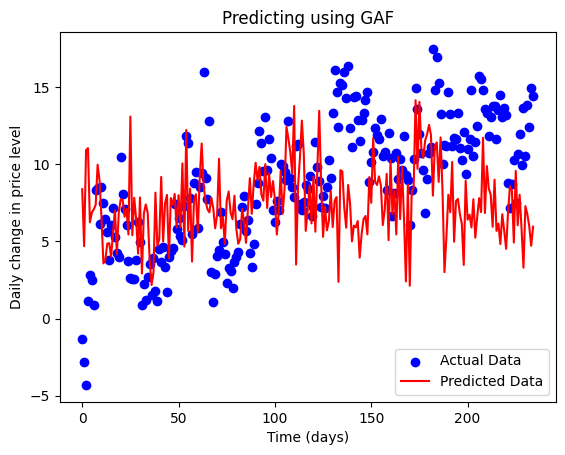

In [ ]:
# Plotting the actual data (y_data_test)
plt.scatter(range(len(y_data_test)), y_data_test, label='Actual Data', color='blue')

# Plotting the predicted data (y_pred)
plt.plot(range(len(y_pred)), y_pred, label='Predicted Data', color='red')

# Adding labels and a legend
plt.xlabel('Time (days)')
plt.ylabel('Daily change in price level')
plt.title("Predicting using GAF")
plt.legend()

The CNN models all had a negative $R^2$ score. Transforming the time series into Gramian Angular Field images and applying CNNs has shown promise for some tasks, but did not work well here. Potential reasons are - loss of information during image encoding, distortion of price scale and ranges, and translation invariance property of CNNs not applicable for detecting temporal relationships. The visual patterns in GAF images may not have enough predictive signal. The convolutional neural network on the Gramian Angular Field of the fractionally differenced series continued to perform poorly, with a negative $R^2$. This confirms that the image transformation fails to preserve useful predictive information regardless of the differencing order.


# Step 4

We created a multilevel perceptron to predict the next data point in the time series based on a look-back period. The model performed well, explaining 97.4% of the variation in the time series. It appears to be predicting something close to the last value.

For first differences $R^2 = −0.3218$ suggests that the model's predictions perform worse than simply predicting the mean of the target variable. This indicates a poor fit or a model that doesn't capture the relationships well. Since this is an out of sample $R^2$ we cannot actually take the mean of the target variable, but we could try other simple predictors such as predicting zero difference.

For fractional differences-differences: $R^2 = 0.3917$ indicates that the model performs better than predicting the mean, capturing some of the variance in the data but not a perfect fit.

When predicting using a convolutional neural net, we get an R-squared score: -2.6. An $R^2$   score of -2.64 when using a Convolutional Neural Network (CNN) for predicting the next price level indicates that the model's performance is significantly worse than a baseline model that simply predicts the mean of the target variable. This score is highly unexpected and indicates substantial issues with the model's predictions. The CNN might be overfitting the training data, capturing noise rather than true patterns. As a result, when applied to new data, the model's predictions perform extremely poorly.  We are also using a series of price levels which may not be amenable to prediction using Gramian Angular Fields. GAF could be sensitive to the scale and range of price levels. If the price levels vary widely or have outliers, it might affect the angular representations and potentially distort the learned patterns in the transformed space.

When predicting the differenced series using the Gramian Angular Field we get a R^2 value close to zero.  This suggests that the daily changes are close to zero and are uncorrelated; that is, the changes in the stock price approximate a random walk.

When predicting the fractionally differenced series using the Gramian Angular Field we again get a R^2 value which is negative indicating that Gramian Angular Field is not a good predictor for the time series.